<a href="https://colab.research.google.com/github/evierosejo/Metis-Deep-Learning-Project/blob/main/2_DL_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pickle
from google.colab import drive
drive.mount('/content/drive')

X = pickle.load(open('/content/drive/My Drive/METIS/X.pickle', 'rb'))
y = pickle.load(open('/content/drive/My Drive/METIS/y.pickle', 'rb')) 

Mounted at /content/drive


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
import numpy as np 

X_reshape = np.array(X).reshape((-1,224,224,3)) #100x100 images with 3 color channels

X_train, X_test, y_train, y_test = (train_test_split(X_reshape, y, 
                                                     test_size = .2, random_state = 42))

In [12]:
from tensorflow.keras.utils import to_categorical

y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing import image as image_utils
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras.applications import VGG16

In [14]:
preprocess_input(X_train)
preprocess_input(X_test)

array([[[[-1.3939003e+01, -5.9778999e+01, -1.1468000e+02],
         [-1.3939003e+01, -5.9778999e+01, -1.1468000e+02],
         [-1.3939003e+01, -5.9778999e+01, -1.1468000e+02],
         ...,
         [-1.9939003e+01, -4.3778999e+01, -6.7680000e+01],
         [-1.8939003e+01, -4.2778999e+01, -6.6680000e+01],
         [-1.8939003e+01, -4.2778999e+01, -6.6680000e+01]],

        [[-1.3939003e+01, -5.9778999e+01, -1.1468000e+02],
         [-1.3939003e+01, -5.9778999e+01, -1.1468000e+02],
         [-1.3939003e+01, -5.9778999e+01, -1.1468000e+02],
         ...,
         [-1.9939003e+01, -4.3778999e+01, -6.7680000e+01],
         [-1.8939003e+01, -4.2778999e+01, -6.6680000e+01],
         [-1.8939003e+01, -4.2778999e+01, -6.6680000e+01]],

        [[-1.3939003e+01, -5.9778999e+01, -1.1468000e+02],
         [-1.3939003e+01, -5.9778999e+01, -1.1468000e+02],
         [-1.3939003e+01, -5.9778999e+01, -1.1468000e+02],
         ...,
         [-1.9939003e+01, -4.3778999e+01, -6.7680000e+01],
         [

In [15]:
vgg = VGG16(weights="imagenet", input_shape=X_train[0].shape, include_top=False)
vgg.trainable = False
vgg.summary()

58900480/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [16]:
feature_model = Sequential([
    vgg])

feature_model.add(Flatten())
feature_model.add(Dense(64, activation='relu'))

feature_model.add(Dense(6, activation='softmax'))

feature_model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'],
)

In [17]:
from tensorflow.keras.callbacks import EarlyStopping


es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5,  restore_best_weights=True)

history = feature_model.fit(X_train,
          y_train_cat, 
          epochs=5, 
          validation_split=0.2, 
          batch_size=32, 
          callbacks=[es])

Epoch 1/5
104/104 [==============================] - 2036s 20s/step - loss: 1.8793 - accuracy: 0.7902 - val_loss: 0.5363 - val_accuracy: 0.8418
Epoch 2/5
104/104 [==============================] - 2040s 20s/step - loss: 0.1827 - accuracy: 0.9311 - val_loss: 0.4549 - val_accuracy: 0.8901
Epoch 3/5
104/104 [==============================] - 2031s 20s/step - loss: 0.0950 - accuracy: 0.9646 - val_loss: 0.6005 - val_accuracy: 0.8913
Epoch 4/5
104/104 [==============================] - 2031s 20s/step - loss: 0.0388 - accuracy: 0.9843 - val_loss: 0.7189 - val_accuracy: 0.8973
Epoch 5/5
104/104 [==============================] - 2029s 20s/step - loss: 0.0294 - accuracy: 0.9888 - val_loss: 0.5878 - val_accuracy: 0.9070


In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np

preds = np.argmax(feature_model.predict(X_test), axis=-1)
round(accuracy_score(np.array(y_test), preds),4)

0.9237

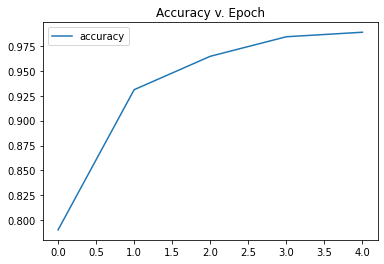

In [30]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.legend(['accuracy'])
plt.title('Accuracy v. Epoch')
plt.savefig('vgg16_accuracy.png', bbox_inches='tight', transparent=True)

In [25]:
pip install visualkeras

     |████████████████████████████████| 795 kB 5.8 MB/s 


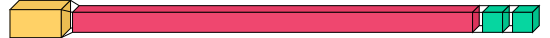

In [27]:
import visualkeras

visualkeras.layered_view(feature_model, legend=True)  # font is optional!
visualkeras.layered_view(feature_model, to_file='featuremodel_output.png') # write to disk
visualkeras.layered_view(feature_model, to_file='featuremodel_output.png').show() # write and show

visualkeras.layered_view(feature_model)

In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

preds = np.argmax(feature_model.predict(X_test), axis=-1)
print(round(accuracy_score(np.array(y_test), preds),4))
print(f1_score(np.array(y_test), preds, average='weighted'))

0.9237
0.9211452696514634


In [31]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

cm_plot_labels = ['Many Varroa', 'Missing Queen', 'Ants','Few Varroa', 'Healthy', 'Hive Theft']

def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 30  10   1   0   0   0]
 [  5 666   2   2   0   2]
 [  1   8 101   0   0   4]
 [  1   6   1  76   0   1]
 [  4   2   0   0   1   0]
 [  0   2  27   0   0  82]]


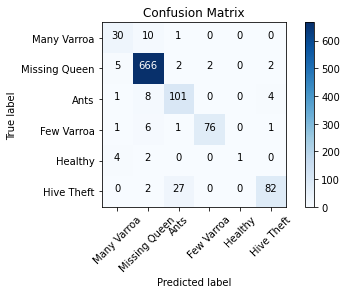

In [34]:
cm = confusion_matrix(y_true=y_test, y_pred=preds)

plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')
plt.savefig('vgg_cm.png', bbox_inches='tight', transparent=True)

In [ ]:
show_images()